In [2]:
import pyarrow.feather as feather
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Data Reading & Converting

## Arrivals Eurostat (Montly) - NOT CURRENTLY BEING USED

In [3]:
# Import
eurostat_arrivals = pd.read_parquet("../dados_tese/parquets/Arrivals/tour_occ_arm.parquet")

In [4]:
# Visualize filter for Portugal
eurostat_arrivals[eurostat_arrivals["geo"] == "PT"]

,unit,c_resid,nace_r2,geo,date,year,month,value
4600,NR,DOM,I551,PT,2022M11,2022,11,589979.00
4601,NR,DOM,I551,PT,2022M10,2022,10,758403.00
4602,NR,DOM,I551,PT,2022M09,2022,09,839075.00
4603,NR,DOM,I551,PT,2022M08,2022,08,1049890.00
4604,NR,DOM,I551,PT,2022M07,2022,07,916551.00
...,...,...,...,...,...,...,...,...
269574,PCH_SM_2Y,TOTAL,I552_I553,PT,2008M05,2008,05,7.37
269575,PCH_SM_2Y,TOTAL,I552_I553,PT,2008M04,2008,04,-27.15
269576,PCH_SM_2Y,TOTAL,I552_I553,PT,2008M03,2008,03,57.82
269577,PCH_SM_2Y,TOTAL,I552_I553,PT,2008M02,2008,02,28.90


In [5]:
# Filter for Portugal and create "date" columns
portugal_arrivals = eurostat_arrivals[eurostat_arrivals["geo"] == "PT"]
summed_arrivals_pt = portugal_arrivals.groupby(by=["year", "month"]).sum()

/tmp/ipykernel_94703/3049631883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_arrivals_pt = portugal_arrivals.groupby(by=["year", "month"]).sum()


In [6]:
summed_arrivals_pt

value
year month             
1990 01      1381436.00
     02      1623864.00
     03      2142260.00
     04      2842040.00
     05      2768020.00
...                 ...
2022 07     14989547.61
     08     17446787.99
     09     13410946.41
     10     11679614.94
     11      7625005.40

[395 rows x 1 columns]

In [7]:
# Reset row index
summed_arrivals_pt.reset_index(inplace=True)

In [8]:
# Create single "date" column
summed_arrivals_pt["date"] = summed_arrivals_pt["year"].astype(str) + "-" + summed_arrivals_pt["month"].astype(str)

In [9]:
# Drop previous date columns
summed_arrivals_pt = summed_arrivals_pt.drop(columns=["year", "month"])

In [10]:
# Insert "date" column at the end
first_column = summed_arrivals_pt.pop('date')
summed_arrivals_pt.insert(0, 'date', first_column)

In [11]:
# Choose wanted dates
summed_arrivals_pt = summed_arrivals_pt[(summed_arrivals_pt["date"] >= "2015-01") & (summed_arrivals_pt["date"] <= "2019-12")]

In [12]:
summed_arrivals_pt

,date,value
300,2015-01,3031563.05
301,2015-02,3558734.23
302,2015-03,4696029.69
303,2015-04,6004168.67
304,2015-05,7375374.09
305,2015-06,7536506.41
306,2015-07,9144518.33
307,2015-08,11588320.06
308,2015-09,8386720.27
309,2015-10,6559792.67


## Arrivals Eurocontrol (Daily)

In [13]:
# Import
daily_arrivals = pd.read_parquet("../dados_tese/parquets/Arrivals/Airport_Traffic_Eurocontrol.parquet")

In [14]:
# Visualize
daily_arrivals

,year,month,day,country,airport,arrivals
0,2016,1,01,Belgium,Antwerp (EBAW),3
1,2016,1,01,Belgium,Brussels (EBBR),171
2,2016,1,01,Belgium,Charleroi (EBCI),47
3,2016,1,01,Belgium,Liège (EBLG),7
4,2016,1,01,Belgium,Ostend-Bruges (EBOS),7
...,...,...,...,...,...,...
754967,2022,12,31,Serbia,Belgrade - Nikola Tesla (LYBE),62
754968,2022,12,31,Montenegro,Podgorica (LYPG),14
754969,2022,12,31,Slovakia,Bratislava (LZIB),7
754970,2022,12,31,Armenia,Yerevan (UDYZ),51


In [15]:
# Filter for Portugal and create date columns
portugal_arrivals = daily_arrivals[daily_arrivals["country"] == "Portugal"]
summed_arrivals_pt = portugal_arrivals.groupby(by=["year", "month", "day"]).sum()

/tmp/ipykernel_94703/1828519405.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_arrivals_pt = portugal_arrivals.groupby(by=["year", "month", "day"]).sum()


In [16]:
# Reset index of rows
summed_arrivals_pt.reset_index(inplace=True)

In [17]:
# Create "date" column
summed_arrivals_pt["date"] = summed_arrivals_pt["year"].astype(str) + "-" + summed_arrivals_pt["month"].astype(str) + "-" + summed_arrivals_pt["day"].astype(str)

In [18]:
# Drop now unnecessary date columns
summed_arrivals_pt = summed_arrivals_pt.drop(columns=["year", "month","day"])

In [19]:
# Move "date" column to the beginning
first_column = summed_arrivals_pt.pop('date')
summed_arrivals_pt.insert(0, 'date', first_column)

In [20]:
# Reformating the date column
summed_arrivals_pt.loc[summed_arrivals_pt['date'].str.len() == 9, "date"] = summed_arrivals_pt['date'].str[:5] + "0" + summed_arrivals_pt['date'].str[5:]

In [21]:
# Choosing time interval
summed_arrivals_pt = summed_arrivals_pt[(summed_arrivals_pt["date"] > "2015-12-31") & (summed_arrivals_pt["date"] < "2020-01-01")]

In [22]:
# Visualize
summed_arrivals_pt

,date,arrivals
0,2016-01-01,375
1,2016-01-02,469
2,2016-01-03,485
3,2016-01-04,484
4,2016-01-05,417
...,...,...
1456,2019-12-27,571
1457,2019-12-28,568
1458,2019-12-29,561
1459,2019-12-30,564


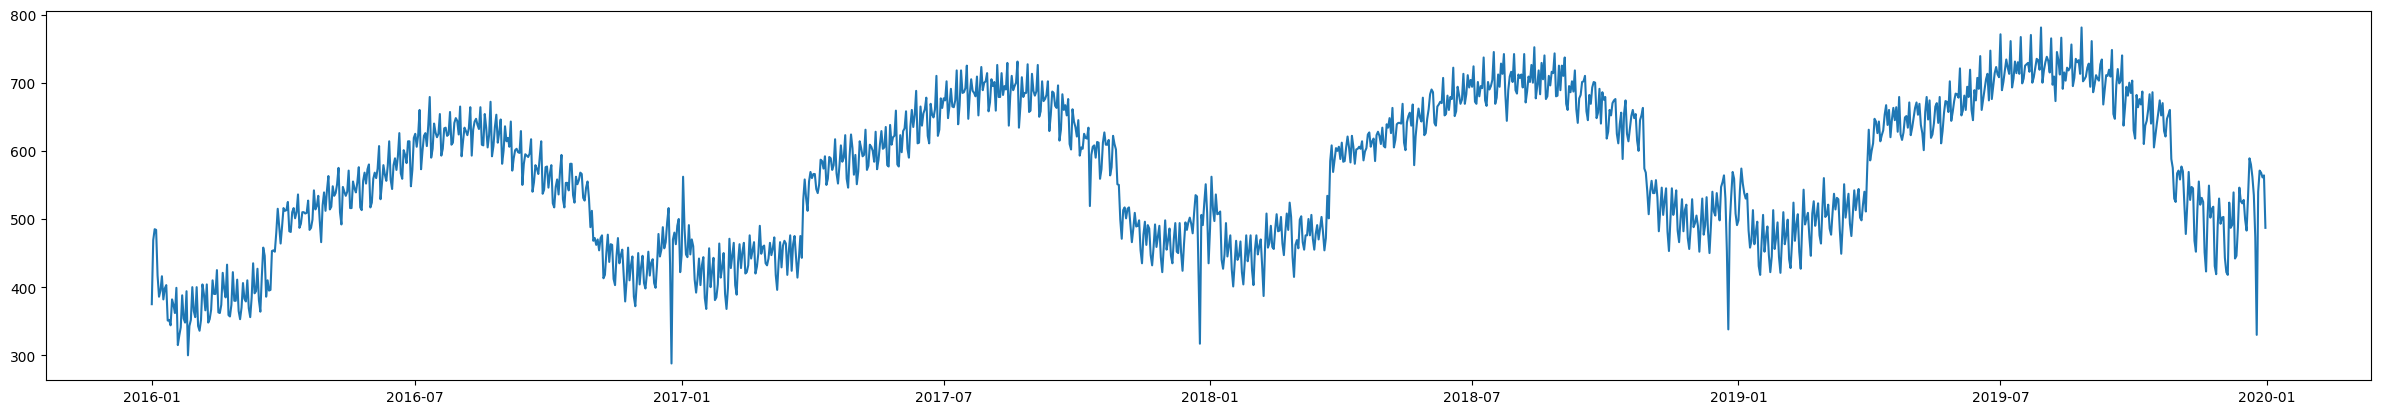

In [23]:
# Further visualizations
arrivals_vis = summed_arrivals_pt[["arrivals"]].values.astype('float32')
dates_vis = summed_arrivals_pt[["date"]].values.astype('datetime64')
plt.figure().set_figwidth(30)
plt.plot(dates_vis, arrivals_vis)
plt.show()

## Trends

In [24]:
# Import multiple files
mypath = "/data/dados_tese/portugal_trends_2015-2019/"
onlyfiles = [(mypath + f, f) for f in listdir(mypath) if isfile(join(mypath, f))]

trends = pd.DataFrame(data={'date': []})

for file_path, file_name in onlyfiles:
    join_column = pd.read_feather(file_path)
    join_column["date"] =  join_column["date"].astype(str)
    join_column = join_column.drop(file_name.split('-')[0], axis=1)
    join_column = join_column[(join_column["date"] > "2015-12-31") & (join_column["date"] < "2020-01-01")]
    trends = trends.merge(join_column, on='date', how='outer')


In [25]:
trends.describe()

,Portugal_shopping_norm,Portugal_accomodation_norm,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_subway_norm,Portugal_tourist_attractions_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_shopping_map_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_snack_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_hotel_booking_norm,Portugal_specialty_norm,Portugal_weather_norm,Portugal_attractions_norm,Portugal_food_norm
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.00000,1461.000000,1461.000000,1096.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.813203,5.220157,65.528371,7.792731,4.303066,1.352300,8.710281,64.634682,3.625756,25.947871,31.272088,5.46911,66.028446,63.463155,30.044772,4.621862,21.088282,17.611300,18.208364
std,29.890448,11.771461,13.002794,15.814064,11.985158,7.256738,13.309998,11.780598,9.916544,8.647741,15.659355,13.94072,15.054652,13.858157,20.414981,11.835123,19.527202,15.452161,21.592998
min,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,11.000000,0.000000,0.00000,27.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,55.600000,0.000000,0.000000,0.000000,0.000000,56.930000,0.000000,20.120000,26.560000,0.00000,54.080000,56.890000,12.525000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,66.780000,0.000000,0.000000,0.000000,0.000000,66.290000,0.000000,26.040000,37.890000,0.00000,65.640000,66.830000,32.000000,0.000000,24.440000,18.000000,0.000000
75%,57.000000,0.000000,75.500000,7.360000,0.000000,0.000000,14.000000,72.570000,0.000000,30.360000,41.720000,0.00000,78.670000,72.820000,46.280000,0.000000,39.160000,28.000000,41.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,88.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,84.000000,100.000000,100.000000,100.000000


In [26]:
# Drop columns too sparse
trends = trends.drop("Portugal_accomodation_norm", axis=1)
trends = trends.drop("Portugal_subway_norm", axis=1)
trends = trends.drop("Portugal_tourist_attractions_norm", axis=1)
trends = trends.drop("Portugal_shopping_map_norm", axis=1)
trends = trends.drop("Portugal_snack_norm", axis=1)
trends = trends.drop("Portugal_specialty_norm", axis=1)
trends = trends.drop("Portugal_hotel_booking_norm", axis=1)
trends = trends.drop("Portugal_shopping_norm", axis=1)

In [27]:
trends.describe()

,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,Portugal_attractions_norm,Portugal_food_norm
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,65.528371,7.792731,8.710281,64.634682,25.947871,31.272088,66.028446,63.463155,21.088282,17.611300,18.208364
std,13.002794,15.814064,13.309998,11.780598,8.647741,15.659355,15.054652,13.858157,19.527202,15.452161,21.592998
min,28.000000,0.000000,0.000000,29.000000,11.000000,0.000000,27.000000,24.000000,0.000000,0.000000,0.000000
25%,55.600000,0.000000,0.000000,56.930000,20.120000,26.560000,54.080000,56.890000,0.000000,0.000000,0.000000
50%,66.780000,0.000000,0.000000,66.290000,26.040000,37.890000,65.640000,66.830000,24.440000,18.000000,0.000000
75%,75.500000,7.360000,14.000000,72.570000,30.360000,41.720000,78.670000,72.820000,39.160000,28.000000,41.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


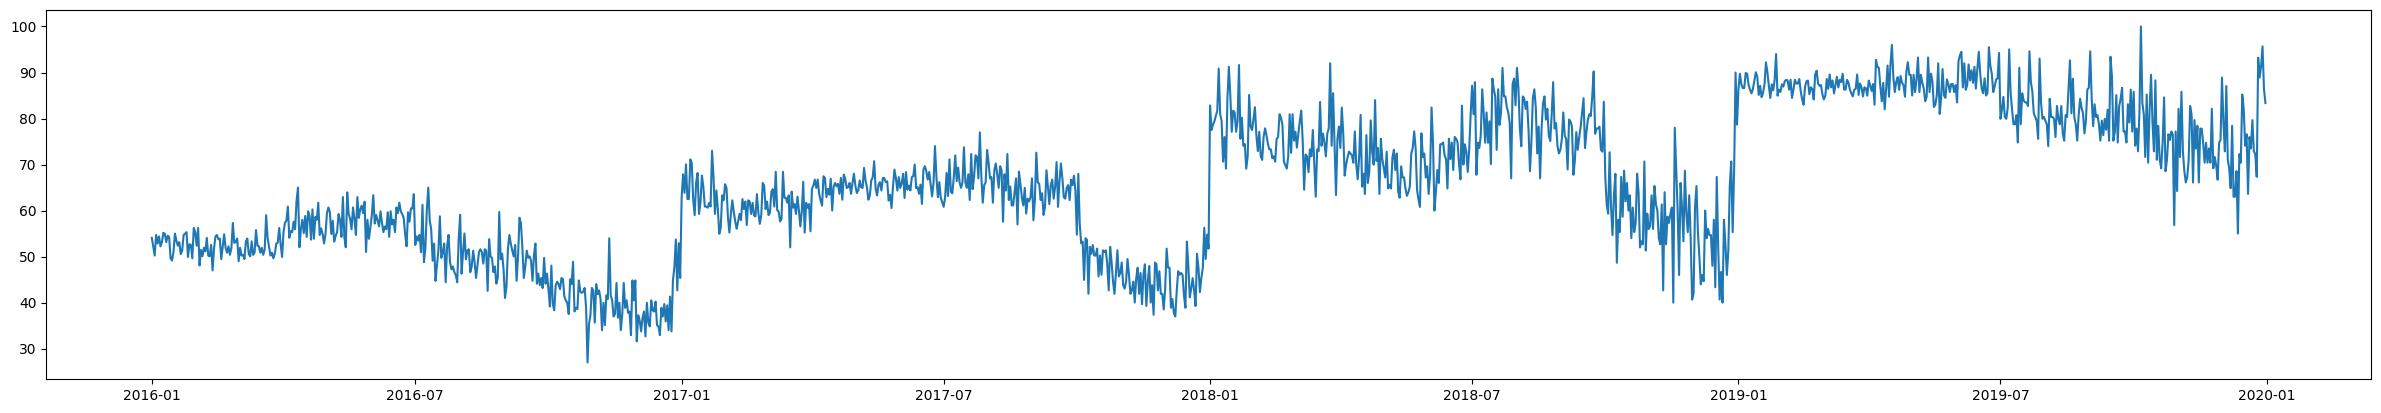

In [28]:
# Visualization
trends_vis = trends[["Portugal_flights_norm"]].values.astype('float32')
dates_trends_vis = trends[["date"]].values.astype('datetime64')
plt.figure().set_figwidth(30)
plt.plot(dates_trends_vis, trends_vis)
plt.show()

## Currency

In [29]:
# Import
currency = pd.read_parquet("/data/dados_tese/parquets/Exchanges/currencyExchanges.parquet")

In [30]:
currency

,Date,EURKRW_Open,EURKRW_High,EURKRW_Low,EURKRW_Close,EURKRW_AdjClose,EURCHF_Open,EURCHF_High,EURCHF_Low,EURCHF_Close,...,EURAUD_Open,EURAUD_High,EURAUD_Low,EURAUD_Close,EURAUD_AdjClose,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,EURUSD_AdjClose
0,1999-01-05,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1999-01-06,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1999-01-07,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1999-01-08,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1999-01-13,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,2022-12-22,1357.449951,1362.010010,1353.619995,1356.349976,1356.349976,0.982900,0.986340,0.981700,0.982900,...,1.579600,1.588730,1.572550,1.579600,1.579600,1.061008,1.065746,1.058403,1.061008,1.061008
6256,2022-12-26,1358.209961,1358.219971,1358.209961,1359.130005,1359.130005,0.991000,0.992300,0.988600,0.991000,...,1.582060,1.587100,1.575950,1.582060,1.582060,1.06678,1.063717,1.060895,1.06678,1.06678
6257,2022-12-27,1358.219971,1358.219971,1347.199951,1358.219971,1358.219971,0.991570,0.992300,0.987300,0.991570,...,1.577530,1.581770,1.573600,1.577530,1.577530,1.064022,1.0669,1.061244,1.064022,1.064022
6258,2022-12-28,1352.310059,1353.630005,1346.140015,1352.310059,1352.310059,0.988600,0.990280,0.984400,0.988600,...,1.580790,1.581420,1.565460,1.580790,1.580790,1.063717,1.06743,1.061391,1.063717,1.063717


In [31]:
# Drop unwanted columns
for col in currency.columns:
    if col != "Date" and "Open" not in col:
        currency = currency.drop([col], axis=1)

In [32]:
# Choose time frame
currency = currency[(currency["Date"] >= "2016-01-01") & (currency["Date"] <= "2019-12-31")]

In [33]:
currency = currency.rename(columns={"Date": "date"})

In [34]:
currency

,date,EURKRW_Open,EURCHF_Open,EURRUB_Open,EURINR_Open,EURBRL_Open,EURGBP_Open,EURJPY_Open,EURHKD_Open,EURCNY_Open,EURCAD_Open,EURAUD_Open,EURUSD_Open
2222,2016-01-04,1275.380005,1.084600,76.557198,71.814003,4.296000,0.736380,130.550003,8.410000,7.022800,1.505560,1.489500,1.085505
2223,2016-01-06,1278.079956,1.084280,78.630898,71.447998,4.328500,0.732500,128.037003,8.332500,7.001000,1.503670,1.501000,1.075199
2224,2016-01-07,1290.810059,1.085600,80.083603,71.836998,4.334100,0.736630,127.820000,8.354060,7.060000,1.516000,1.522200,1.077795
2225,2016-01-08,1305.890015,1.085700,80.469803,73.042000,4.414300,0.747000,128.408005,8.472000,7.188800,1.540960,1.557760,1.092705
2226,2016-01-12,1307.810059,1.087300,82.449097,72.445000,4.398600,0.746430,127.755997,8.428100,7.124500,1.544060,1.553730,1.085894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,2019-12-19,1294.180054,1.089370,69.681702,78.848000,4.513000,0.849460,121.762001,8.656680,7.775500,1.457610,1.621320,1.111593
5875,2019-12-20,1291.829956,1.088220,69.353104,79.089996,4.523300,0.854570,121.681000,8.669950,7.787300,1.459770,1.614340,1.112372
5876,2019-12-23,1282.410034,1.088270,68.863602,78.004898,4.540800,0.851900,121.309998,8.638180,7.749200,1.456340,1.604240,1.107984
5877,2019-12-26,1288.199951,1.086850,68.618301,78.959000,4.524100,0.855200,121.341003,8.640450,7.758300,1.459200,1.601970,1.109509


## Inflation

In [35]:
# Import
inflation = pd.read_parquet("/data/dados_tese/parquets/Inflation/prc_hicp_manr.parquet")

In [36]:
inflation

,unit,coicop,geo,date,year,month,value
0,RCH_A,AP,AT,2022M12,2022,12,4.5
1,RCH_A,AP,AT,2022M11,2022,11,4.4
2,RCH_A,AP,AT,2022M10,2022,10,4.3
3,RCH_A,AP,AT,2022M09,2022,09,3.8
4,RCH_A,AP,AT,2022M08,2022,08,3.4
...,...,...,...,...,...,...,...
2922651,RCH_A,TOT_X_TBC,XK,2017M04,2017,04,2.1
2922652,RCH_A,TOT_X_TBC,XK,2017M03,2017,03,1.4
2922653,RCH_A,TOT_X_TBC,XK,2017M02,2017,02,1.5
2922654,RCH_A,TOT_X_TBC,XK,2017M01,2017,01,1.6


In [37]:
# Choosing the prefered settings for the inflation values
inflation_good = inflation[(inflation["coicop"] == "CP00") & (inflation["geo"] == "PT")]

In [38]:
# Choosing the time period
inflation_good = inflation_good[(inflation_good["year"] >= "2016") & (inflation_good["year"] <= "2019")]

In [39]:
# Creating the "date" column
inflation_good["date"] = inflation_good["year"] + "-" + inflation_good["month"] + "-28"

In [40]:
# Dropping unnecessary columns
inflation_good = inflation_good.drop(["unit", "coicop", "geo", "year", "month"], axis=1)

In [41]:
# Changing the scale of the values so that interpolation will be smoother
inflation_good["value"] = inflation_good["value"] * 1000

In [42]:
inflation_good = inflation_good.rename(columns={"value": "inflation"})

In [43]:
# Getting values for interpolation and fixing the table
# (interpolation will be done in the end when all columns that are to be interpolated are taken care of)
inflation_good = inflation_good.reset_index(drop=True)
first_value = inflation_good.loc[0]['inflation']
last_value = inflation_good.loc[len(inflation_good.index) - 1]['inflation']

new_first_row = pd.DataFrame({'date':'2019-12-31', 'inflation':first_value}, index=[0])
inflation_good = pd.concat([new_first_row,inflation_good.loc[:]]).reset_index(drop=True)

new_last_row = {'date':'2016-01-01', 'inflation':last_value}
inflation_good = inflation_good.append(new_last_row, ignore_index=True)

/tmp/ipykernel_94703/3020152876.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inflation_good = inflation_good.append(new_last_row, ignore_index=True)


In [44]:
inflation_good

,date,inflation
0,2019-12-31,400.0
1,2019-12-28,400.0
2,2019-11-28,200.0
3,2019-10-28,-100.0
4,2019-09-28,-300.0
5,2019-08-28,-100.0
6,2019-07-28,-700.0
7,2019-06-28,700.0
8,2019-05-28,300.0
9,2019-04-28,900.0


## GDP - NOT CURRENTLY IN USE (data frequency too low)

In [33]:
gdp = pd.read_parquet("/data/dados_tese/parquets/GDP/NAMQ_10_GDP.parquet")

In [35]:
gdp_good = gdp[(gdp["na_item"] == "B1GQ") & (gdp["unit"] == "CP_MEUR") & (gdp["s_adj"] == "NSA") & (gdp["geo"] == "PT")]

In [38]:
gdp_good = gdp_good[(gdp_good["year"] >= "2016") & (gdp_good["year"] <= "2019")]

In [50]:
months = ["03", "06", "09", "12"]
days = ["31", "30", "30", "31"]
gdp_good["date"] = gdp_good.apply(lambda x: x.year + "-" + months[int(x.quarter)-1] + "-" + days[int(x.quarter)-1], axis=1)

/tmp/ipykernel_9889/2023308128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_good["date"] = gdp_good.apply(lambda x: x.year + "-" + months[int(x.quarter)-1] + "-" + days[int(x.quarter)-1], axis=1)


In [52]:
gdp_good = gdp_good.rename(columns={"value": "gdp"})

In [53]:
gdp_good = gdp_good.drop(["unit", "s_adj", "na_item", "geo", "year", "quarter"], axis=1)

In [55]:
gdp_good = gdp_good.reset_index(drop=True)
last_value = gdp_good.loc[len(gdp_good.index) - 1]['gdp']

new_last_row = {'date':'2016-01-01', 'gdp':last_value}
gdp_good = gdp_good.append(new_last_row, ignore_index=True)

In [56]:
gdp_good

,date,gdp
0,2019-12-31,55121.5
1,2019-09-30,54423.3
2,2019-06-30,53740.9
3,2019-03-31,51088.9
4,2018-12-31,52858.7
5,2018-09-30,52348.9
6,2018-06-30,51366.8
7,2018-03-31,48609.7
8,2017-12-31,50011.9
9,2017-09-30,49945.5


## Merging

In [45]:
merged_data = trends.merge(summed_arrivals_pt, how='outer', on='date')

In [46]:
merged_data = merged_data.merge(currency, how='outer', on='date')

In [47]:
merged_data = merged_data.merge(inflation_good, how='outer', on='date')

In [ ]:
# merged_data = merged_data.merge(gdp_good, how='outer', on='date')

In [49]:
merged_data.describe()

,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,Portugal_attractions_norm,Portugal_food_norm,arrivals,inflation
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,50.000000
mean,65.528371,7.792731,8.710281,64.634682,25.947871,31.272088,66.028446,63.463155,21.088282,17.611300,18.208364,566.796715,898.000000
std,13.002794,15.814064,13.309998,11.780598,8.647741,15.659355,15.054652,13.858157,19.527202,15.452161,21.592998,103.812062,645.072374
min,28.000000,0.000000,0.000000,29.000000,11.000000,0.000000,27.000000,24.000000,0.000000,0.000000,0.000000,288.000000,-700.000000
25%,55.600000,0.000000,0.000000,56.930000,20.120000,26.560000,54.080000,56.890000,0.000000,0.000000,0.000000,482.000000,500.000000
50%,66.780000,0.000000,0.000000,66.290000,26.040000,37.890000,65.640000,66.830000,24.440000,18.000000,0.000000,573.000000,800.000000
75%,75.500000,7.360000,14.000000,72.570000,30.360000,41.720000,78.670000,72.820000,39.160000,28.000000,41.000000,657.000000,1300.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,781.000000,2400.000000


In [50]:
merged_data.sample(20)

,date,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,...,EURINR_Open,EURBRL_Open,EURGBP_Open,EURJPY_Open,EURHKD_Open,EURCNY_Open,EURCAD_Open,EURAUD_Open,EURUSD_Open,inflation
948,2018-08-06,75.25,0.00,28.48,81.32,32.36,63.00,84.42,69.80,74.24,...,79.216003,4.284300,0.889190,128.578995,9.072700,7.861500,1.504410,1.563500,1.156136,NaN
113,2016-04-23,80.78,0.00,0.00,66.25,21.00,0.00,58.62,73.33,41.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,2017-11-04,52.50,0.00,0.00,61.62,23.36,29.97,44.56,41.04,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,2019-01-04,62.93,0.00,0.00,80.49,28.00,39.16,86.61,61.55,36.73,...,79.772003,4.275800,0.901900,122.871002,8.919350,7.819300,1.535330,1.625580,1.139095,NaN
751,2018-01-21,74.78,25.84,14.00,70.86,32.63,46.00,91.62,84.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,2018-03-20,72.11,0.00,14.00,79.71,33.99,40.58,76.74,68.77,0.00,...,80.375000,4.050300,0.879580,130.811996,9.673500,7.803600,1.613690,1.600110,1.233806,NaN
1119,2019-01-24,57.25,25.28,0.00,83.00,24.58,34.00,87.43,64.34,33.38,...,80.945000,4.283400,0.870300,124.657997,8.932230,7.721700,1.518980,1.593300,1.138706,NaN
805,2018-03-16,65.44,0.00,14.00,70.00,31.10,40.06,73.30,64.42,0.00,...,79.889999,4.039300,0.882900,130.809998,9.647900,7.770300,1.606000,1.579840,1.230769,NaN
915,2018-07-04,71.75,0.00,36.27,66.29,29.24,54.44,67.77,83.00,39.90,...,79.838997,4.533600,0.883620,128.712006,9.145820,7.694800,1.532350,1.580170,1.165936,NaN
1409,2019-11-10,63.22,0.00,0.00,56.72,29.88,27.50,80.89,45.92,36.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Interpolation

#merged_data[[col for col in list(currency.columns) + list(inflation_good.columns) + list(gdp_good.columns) if col != "date"]] = merged_data[[col for col in list(currency.columns) + list(inflation_good.columns) + list(gdp_good.columns) if col != "date"]].astype('float32').interpolate(method="quadratic")
merged_data[[col for col in list(currency.columns) + list(inflation_good.columns) if col != "date"]] = merged_data[[col for col in list(currency.columns) + list(inflation_good.columns) if col != "date"]].astype('float32').interpolate(method="quadratic")

#.interpolate(method="quadratic")
#[col for col in merged_data.columns if "Open" in col]

In [54]:
# Null check
merged_data[merged_data.isnull().any(axis=1)]

,date,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,...,EURINR_Open,EURBRL_Open,EURGBP_Open,EURJPY_Open,EURHKD_Open,EURCNY_Open,EURCAD_Open,EURAUD_Open,EURUSD_Open,inflation


In [57]:
# Move the arrivals column to the end for later better visualization
merged_data = merged_data[[c for c in merged_data if c != 'arrivals'] + ['arrivals']]

In [58]:
merged_data

,date,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,...,EURBRL_Open,EURGBP_Open,EURJPY_Open,EURHKD_Open,EURCNY_Open,EURCAD_Open,EURAUD_Open,EURUSD_Open,inflation,arrivals
0,2016-01-01,51.39,0.00,32.76,55.72,22.13,0.00,54.08,59.50,36.24,...,4.289100,0.736730,130.612000,8.414900,7.022800,1.509300,1.493330,1.085906,700.000000,375
1,2016-01-02,44.87,0.00,0.00,48.03,21.67,0.00,52.23,69.10,31.88,...,4.241945,0.736623,131.239822,8.419034,6.990259,1.504893,1.479560,1.086726,711.217285,469
2,2016-01-03,55.52,0.00,11.44,55.11,20.29,0.00,50.23,71.80,35.10,...,4.244245,0.736506,131.219162,8.417400,6.990259,1.503647,1.478283,1.086593,721.571716,485
3,2016-01-04,51.61,0.00,0.00,55.72,20.75,0.00,54.69,73.00,30.74,...,4.296000,0.736380,130.550003,8.410000,7.022800,1.505560,1.489500,1.085505,731.063293,484
4,2016-01-05,54.22,0.00,0.00,58.35,15.00,0.00,52.85,65.80,29.79,...,4.369400,0.735650,129.298996,8.389590,7.062600,1.508430,1.506730,1.082603,739.692017,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2019-12-27,59.19,16.25,0.00,63.18,22.75,28.81,88.90,64.92,30.80,...,4.524100,0.853700,121.714996,8.644270,7.757900,1.455190,1.597590,1.110124,398.981873,571
1457,2019-12-28,58.88,0.00,16.40,57.10,22.98,29.56,91.37,48.96,40.48,...,4.514729,0.853223,122.107224,8.658854,7.769006,1.454865,1.596544,1.112064,400.000000,568
1458,2019-12-29,74.38,29.90,0.00,78.00,22.06,31.06,95.68,71.00,33.44,...,4.503146,0.853681,122.428619,8.684548,7.791493,1.458841,1.599636,1.115272,400.509064,561
1459,2019-12-30,65.70,0.00,0.00,67.74,28.73,27.50,86.44,59.22,29.92,...,4.497200,0.854060,122.401001,8.707010,7.808400,1.461830,1.600940,1.118155,400.509064,564


## Visualizing some characteristics of the data

/tmp/ipykernel_94703/1414411778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(merged_data.corr())


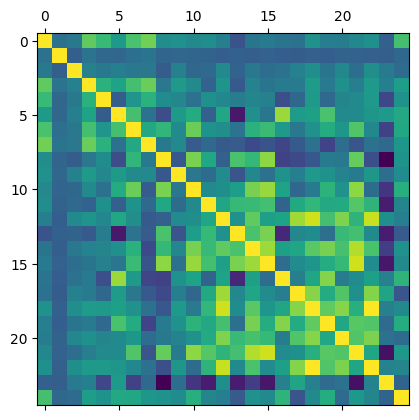

In [59]:
# Correlation matrix
plt.matshow(merged_data.corr())
plt.show()

In [62]:
# Describe part 1
merged_data[[c for c in merged_data.columns if "norm" in c]].describe()

,Portugal_airport_norm,Portugal_travel_guide_norm,Portugal_travel_map_norm,Portugal_travel_norm,Portugal_tickets_norm,Portugal_map_norm,Portugal_flights_norm,Portugal_hotels_norm,Portugal_weather_norm,Portugal_attractions_norm,Portugal_food_norm
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,65.528371,7.792731,8.710281,64.634682,25.947871,31.272088,66.028446,63.463155,21.088282,17.611300,18.208364
std,13.002794,15.814064,13.309998,11.780598,8.647741,15.659355,15.054652,13.858157,19.527202,15.452161,21.592998
min,28.000000,0.000000,0.000000,29.000000,11.000000,0.000000,27.000000,24.000000,0.000000,0.000000,0.000000
25%,55.600000,0.000000,0.000000,56.930000,20.120000,26.560000,54.080000,56.890000,0.000000,0.000000,0.000000
50%,66.780000,0.000000,0.000000,66.290000,26.040000,37.890000,65.640000,66.830000,24.440000,18.000000,0.000000
75%,75.500000,7.360000,14.000000,72.570000,30.360000,41.720000,78.670000,72.820000,39.160000,28.000000,41.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [63]:
# Describe part 2
merged_data[[c for c in merged_data.columns if "norm" not in c]].describe()

,EURKRW_Open,EURCHF_Open,EURRUB_Open,EURINR_Open,EURBRL_Open,EURGBP_Open,EURJPY_Open,EURHKD_Open,EURCNY_Open,EURCAD_Open,EURAUD_Open,EURUSD_Open,inflation,arrivals
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,1286.817993,1.117143,71.503807,76.630241,4.039996,0.864238,124.854317,8.855295,7.598224,1.486614,1.538226,1.134402,915.117188,566.796715
std,38.124832,0.033834,5.130547,3.560833,0.401241,0.037814,5.830298,0.370933,0.232264,0.042521,0.069375,0.044588,634.902283,103.812062
min,1158.346436,1.062259,59.039780,67.026779,3.196986,0.732500,110.358055,8.068290,6.902716,1.379490,1.370720,1.039393,-739.917480,288.000000
25%,1263.543091,1.088870,69.114601,74.275002,3.690100,0.853180,120.837418,8.638820,7.389500,1.460010,1.483600,1.107984,539.121460,482.000000
50%,1290.810059,1.108910,71.483002,76.674004,4.076900,0.875330,124.709999,8.799820,7.658500,1.486915,1.553210,1.127904,803.808655,573.000000
75%,1315.400024,1.142540,74.367996,79.252792,4.374300,0.889077,129.615997,9.114850,7.794500,1.511850,1.597810,1.164077,1386.487183,657.000000
max,1367.780029,1.200024,92.085922,85.744003,4.938700,0.932120,138.180008,9.815446,8.043100,1.613690,1.666119,1.255372,2411.020508,781.000000


### Save data

Make the cell below a code cell to save the data to the disk (change path accordingly)